In [65]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

- - Data Reference: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

In [66]:
df= pd.read_csv('Sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#### Attribute information
- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

 

In [67]:
_data = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'Duplicated' :df.duplicated().sum(),
    'NaN':df.isna().sum(),
    'Type':df.dtypes.values
})
_data

,Unique,Null,NullPercent,Duplicated,NaN,Type
Invoice ID,1000,0,0.0,0,0,object
Branch,3,0,0.0,0,0,object
City,3,0,0.0,0,0,object
Customer type,2,0,0.0,0,0,object
Gender,2,0,0.0,0,0,object
Product line,6,0,0.0,0,0,object
Unit price,943,0,0.0,0,0,float64
Quantity,10,0,0.0,0,0,int64
Tax 5%,990,0,0.0,0,0,float64
Total,990,0,0.0,0,0,float64


### Kiểm tra sự tương quan giữa các thuộc tính.
- Dùng headmaps để trực quan vấn đề tương quan.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8108\3233492852.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


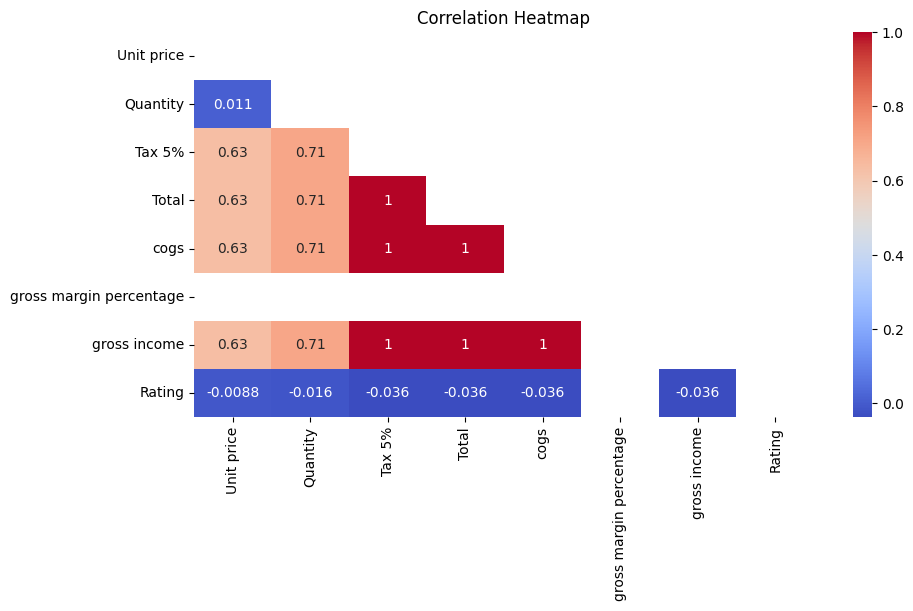

In [68]:
df_corr = df.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(10, 5))
sns.heatmap(df_corr, cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap")
plt.show()

##### Nhận xét: 
- Thuộc tính Total tương quan mạnh với Tax 5%, Quantity
- COGS: tương quan mạnh với Total, Tax 5% và Quantity
- Tax 5% tương quan mạnh với Quantity
- Gross Income: tương quan mạnh với Quantity, Tax 5%, Total và COGS

#### 1. Cho biết tỉ lệ nam và nữ khi mua hàng


<Figure size 300x300 with 0 Axes>

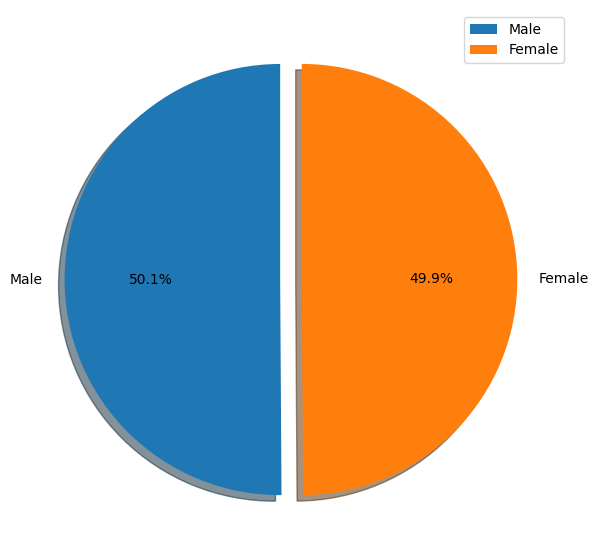

In [69]:
plt.figure(figsize=(3,3))
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(df['Gender'].value_counts(), explode=explode,labels=['Male','Female'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.legend()
plt.show()

##### Nhận xét:
- Chúng ta có thể thấy được tỉ lệ nam và nữa khi mua hàng là như nhau.
- Nam- 50.1% và nữ- 49.9%

#### 2. Cho biết số lượng hàng hoá đã được bán ra thị trường.

In [70]:
feature = df[['Quantity', 'Product line']]
temp = feature.groupby('Product line').sum().sort_values('Quantity', ascending= False)
temp

,Quantity
Product line,
Electronic accessories,971
Food and beverages,952
Sports and travel,920
Home and lifestyle,911
Fashion accessories,902
Health and beauty,854


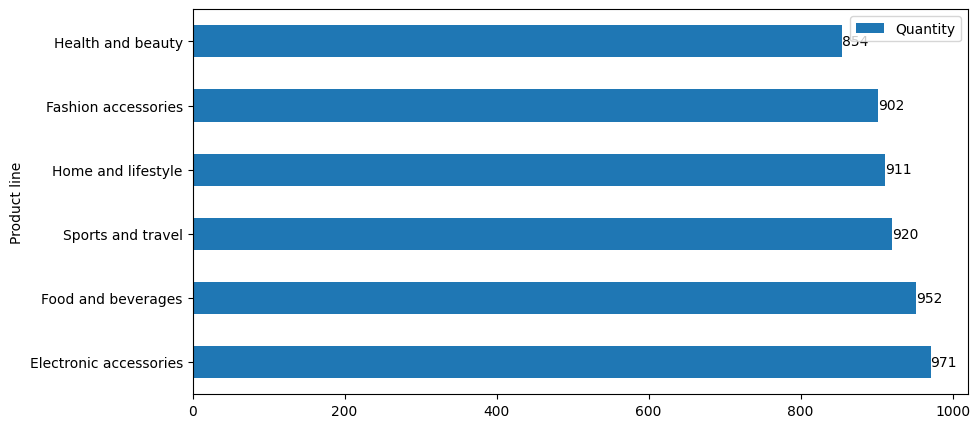

In [71]:
ax=temp.plot(kind='barh', figsize= (10,5))
for container in ax.containers:
    ax.bar_label(container)

##### Nhận xét:
- Dựa vào biều đồ, ta có thể thấy được Electronic accessories là mặt hàng được bán nhiều nhất với 971 sản phẩm được bán 

#### 3. Chi nhánh nào bán được nhiều sản phẩm nhất? Sản phẩm nào được bán nhiều nhất tại chi nhánh đó? 

In [72]:
feature_3 = df[['Branch','Product line', 'Quantity']]
feature_3.head()

,Branch,Product line,Quantity
0,A,Health and beauty,7
1,C,Electronic accessories,5
2,A,Home and lifestyle,7
3,A,Health and beauty,8
4,A,Sports and travel,7


In [73]:
tmp= feature_3.groupby('Branch').sum().sort_values('Quantity', ascending= False)
tmp

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8108\3910634551.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp= feature_3.groupby('Branch').sum().sort_values('Quantity', ascending= False)


,Quantity
Branch,
A,1859
C,1831
B,1820


=> Chi nhánh A là chi nhánh bán được số lượng sản phẩm nhiều nhất với 1859

In [74]:
tmp = feature_3.groupby(['Branch', 'Product line']).sum().sort_values('Quantity', ascending= False)
tmp

Quantity
Branch Product line                    
A      Home and lifestyle           371
C      Food and beverages           369
       Fashion accessories          342
A      Sports and travel            333
C      Electronic accessories       333
A      Electronic accessories       322
B      Sports and travel            322
       Health and beauty            320
       Electronic accessories       316
A      Food and beverages           313
B      Fashion accessories          297
       Home and lifestyle           295
C      Health and beauty            277
B      Food and beverages           270
C      Sports and travel            265
A      Fashion accessories          263
       Health and beauty            257
C      Home and lifestyle           245

=> Tại chi nhánh A, mặt hàng Home and lifestype được bán nhiều nhất với 371 sản phẩm

#### 4. Cho biết tỉ lệ khách hàng mua hàng tại siêu thị của các thành phố.

In [75]:
feature_4 = df[['Invoice ID', 'City']]
temp= feature_4.groupby('City').count()
temp

,Invoice ID
City,
Mandalay,332
Naypyitaw,328
Yangon,340


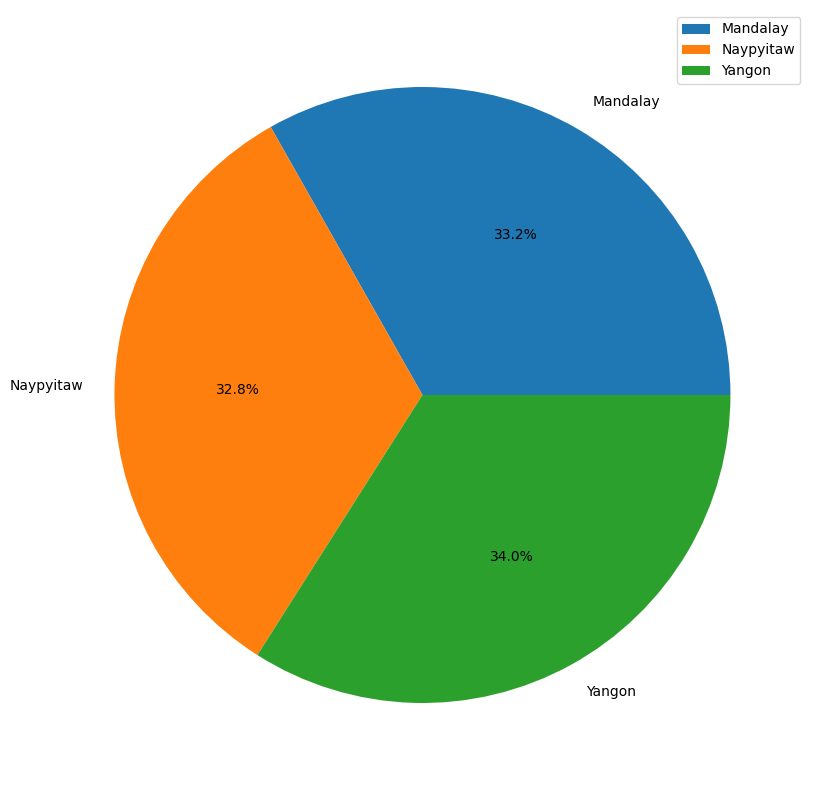

In [76]:
temp.plot(kind='pie', autopct= '%1.1f%%', subplots=True, ylabel='', figsize= (10,10))
plt.show()

#### Nhận xét: 
- Dựa vào biểu đồ ta có thể thấy được tỉ lệ khách hàng sống tại thành phố Yangon mua hàng tại siêu thị nhiều nhất chiếm 34%.
- Tuy nhiên khách hàng giữa các thành phố không chênh lệch quá nhiều. 

#### 5. Cho biết số lượng khách hàng là thành viên và không là thành viên.

In [77]:
feature_5= df[['Customer type', 'Invoice ID']]
temp = feature_5.groupby('Customer type').count()
temp

,Invoice ID
Customer type,
Member,501
Normal,499


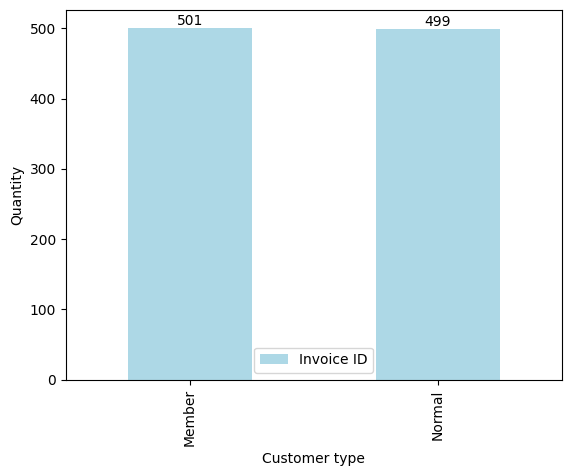

In [78]:
ax= temp.plot(kind='bar', color= 'lightblue')
plt.ylabel('Quantity')
for container in ax.containers:
    ax.bar_label(container)
    

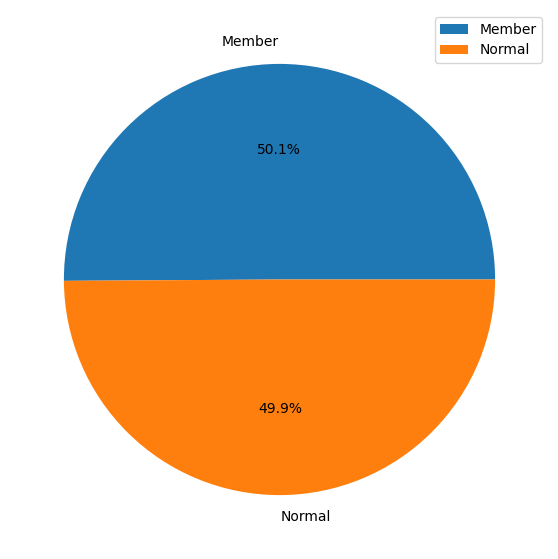

In [79]:
temp.plot(kind='pie', autopct= '%1.1f%%', subplots=True, ylabel='', figsize= (7,7))
plt.show()

##### Nhận xét: 
- Số lượng khách hàng là thành viên gần như tương đương với những khách hàng không phải là thành viên.
- Khách hàng thành viên chiếm 50.1% và khách hàng không là thành viên chiếm 49.9%

#### 6. Cho biết số lượng hàng hoá được bán trong các tháng.

In [80]:
feature_6 = df[['Date', 'Quantity']]
feature_6['month'] = pd.DatetimeIndex(feature_6['Date']).month

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8108\3709763777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_6['month'] = pd.DatetimeIndex(feature_6['Date']).month


In [92]:
feature_6['month'].unique()

array([1, 3, 2], dtype=int64)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8108\3033308321.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  temp = feature_6.groupby('month').sum()


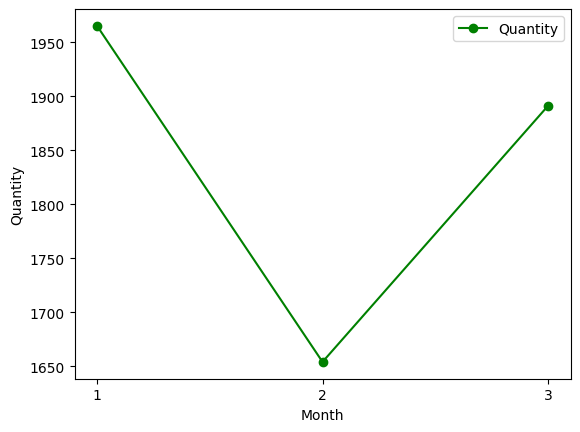

In [99]:
x = ['1', '2', '3']
temp = feature_6.groupby('month').sum()
y = temp['Quantity']
ax= plt.plot(x, y, marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend(['Quantity'])
plt.show()

##### Nhận xét: 
- Nhận thấy tháng 1 bán được nhiều sản phẩm nhất trong trong 3 tháng.
- Lí do có thể do các dịp lễ lớn như Tết, ...